# Sample Notebook

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  

#Options: 'all', 'last', 'last_expr', 'none', 'last_expr_or_assign'

## Setup

### Imports
Put the import statements at the top so it is easy for your readers to know what they must install to use your notebook.

In [44]:
import pandas as pd
import plotnine as gg
import datetime

In [45]:
from tqdm.notebook import tqdm

### Loading Data

In [100]:
Registration_Time = '''
2022-10-19 04:42:04
2022-10-19 10:16:29
2022-10-19 13:27:09
2022-10-19 14:40:24
2022-10-19 15:20:31
2022-10-19 15:47:18
2022-10-19 17:00:23
2022-10-19 22:45:01
'''.strip().splitlines()

org = '''
other
wcm
wcm
cu
wcm
wcm
cu
cu
'''.strip().splitlines()

df = pd.DataFrame({'Registration_Time':Registration_Time, 'org':org})
df

,Registration_Time,org
0,2022-10-19 04:42:04,other
1,2022-10-19 10:16:29,wcm
2,2022-10-19 13:27:09,wcm
3,2022-10-19 14:40:24,cu
4,2022-10-19 15:20:31,wcm
5,2022-10-19 15:47:18,wcm
6,2022-10-19 17:00:23,cu
7,2022-10-19 22:45:01,cu


In [102]:
df = pd.DataFrame({'Registration_Time':Registration_Time, 'org':org})
#df['Registration_Time'] = pd.to_datetime(df['Registration_Time']).dt.tz_localize(None)
df['Registration_Time'] = df['Registration_Time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['org'] = pd.Categorical(df.org, categories=['wcm', 'cu', 'other'])
df['y'] = list(range(df.shape[0]))

In [104]:
df
df.dtypes

,Registration_Time,org,y
0,2022-10-19 04:42:04,other,0
1,2022-10-19 10:16:29,wcm,1
2,2022-10-19 13:27:09,wcm,2
3,2022-10-19 14:40:24,cu,3
4,2022-10-19 15:20:31,wcm,4
5,2022-10-19 15:47:18,wcm,5
6,2022-10-19 17:00:23,cu,6
7,2022-10-19 22:45:01,cu,7


Registration_Time    datetime64[ns]
org                        category
y                             int64
dtype: object

In [105]:
plot_df = (
    df
    .sort_values("Registration_Time")
)#.iloc[:-1]

# plotnine to plot (using grammar of graphics like ggplot2)
plot = (
    gg.ggplot(plot_df, gg.aes(x='Registration_Time', fill='org'))
    + gg.geom_histogram(binwidth=4/24, position='stack', color='black', show_legend=False)
    + gg.facet_wrap('org')
    + gg.theme_bw()
    + gg.theme(figure_size=(8,6))
    + gg.theme(axis_text_x=gg.element_text(angle=30, hjust=1))
    + gg.xlab("Time")
    + gg.ylab("Registrations") 
    + gg.ggtitle("Registrations for R workshop in first 48 hours")
)
plot.show()

TypeError: can't compare offset-naive and offset-aware datetimes

/Users/cjc73/miniforge3/envs/cforge/lib/python3.11/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/Users/cjc73/miniforge3/envs/cforge/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 6 rows containing missing values.


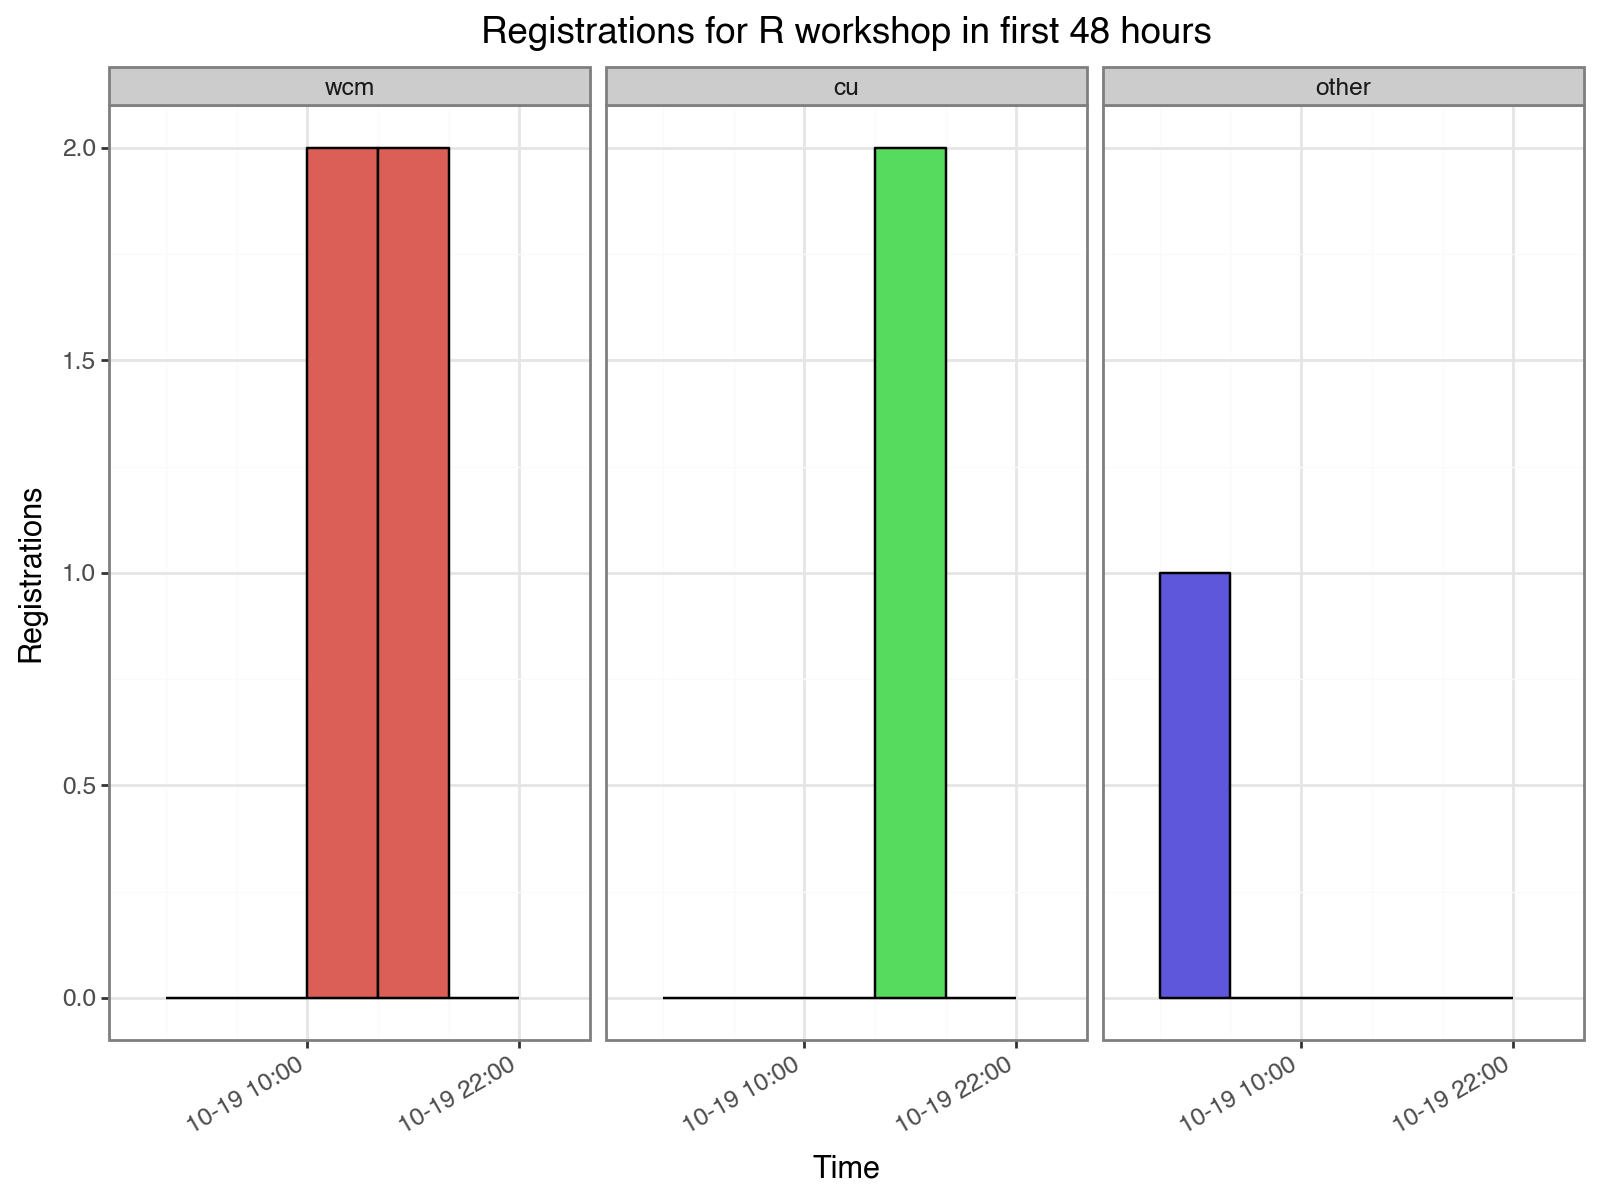

In [95]:
plot_df = (
    df
    .sort_values("Registration_Time")
)#.iloc[:-1]

# plotnine to plot (using grammar of graphics like ggplot2)
plot = (
    gg.ggplot(plot_df, gg.aes(x='Registration_Time', fill='org'))
    + gg.geom_histogram(binwidth=4/24, position='stack', color='black', show_legend=False)
    + gg.scale_x_datetime(
        breaks='12 hours', 
        date_labels='%m-%d %H:%M', 
        limits=[
            pd.to_datetime('2022-10-19 00:00:00').tz_localize(None),
            pd.to_datetime('2022-10-20 00:00:00').tz_localize(None),
        ],
        date_minor_breaks = '4 hours',
    )
    + gg.facet_wrap('org')
    + gg.theme_bw()
    + gg.theme(figure_size=(8,6))
    + gg.theme(axis_text_x=gg.element_text(angle=30, hjust=1))
    + gg.xlab("Time")
    + gg.ylab("Registrations") 
    + gg.ggtitle("Registrations for R workshop in first 48 hours")
)
plot.show()

In [98]:
plot_df = (
    df
    .sort_values("Registration_Time")
)#.iloc[:-1]

# plotnine to plot (using grammar of graphics like ggplot2)
plot = (
    gg.ggplot(plot_df, gg.aes(x='Registration_Time', y='y', color='org'))
    + gg.geom_point()
    + gg.scale_x_datetime(
        breaks='12 hours', 
        date_labels='%m-%d %H:%M', 
        limits=[
            pd.to_datetime('2022-10-19 00:00:00').tz_localize(None),
            pd.to_datetime('2022-10-20 00:00:00').tz_localize(None),
        ],
        date_minor_breaks = '4 hours',
    )
    + gg.theme_bw()
    + gg.theme(figure_size=(4,3))
    + gg.theme(axis_text_x=gg.element_text(angle=30, hjust=1))
    + gg.xlab("Time")
    + gg.ylab("Registrations") 
)
plot.show()

TypeError: unsupported operand type(s) for +: 'Timedelta' and 'int'

In [97]:
df.head()
df.dtypes  #not the types we want!

,Registration_Time,org,y
0,2022-10-19 04:42:04,other,0
1,2022-10-19 10:16:29,wcm,1
2,2022-10-19 13:27:09,wcm,2
3,2022-10-19 14:40:24,cu,3
4,2022-10-19 15:20:31,wcm,4


Registration_Time    datetime64[ns]
org                        category
y                             int64
dtype: object

In [19]:
start_t =  pd.to_datetime('2022-10-18 13:00:00', utc=False)
stop_t = pd.to_datetime('2022-10-20 13:00:00', utc=False)

start_t =  pd.to_datetime('2022-10-19 1:00:00', utc=False)
stop_t = pd.to_datetime('2022-10-20 01:00:00', utc=False)

#pandas to manipulate data
plot_df = (
    df
    .sort_values("Registration_Time")
    .query("(Registration_Time >= @start_t) & (Registration_Time <= @stop_t)")
)

In [20]:
df.dtypes
plot_df.dtypes

Registration Time            object
org                        category
Registration_Time    datetime64[ns]
dtype: object

Registration Time            object
org                        category
Registration_Time    datetime64[ns]
dtype: object

In [32]:
start_t =  pd.to_datetime('2022-10-19 04:30:00', utc=False)
stop_t = pd.to_datetime('2022-10-19 23:00:00', utc=False)

#pandas to manipulate data
plot_df = (
    df
    .sort_values("Registration_Time")
    .query("(Registration_Time >= @start_t) & (Registration_Time <= @stop_t)")
)


# plotnine to plot (using grammar of graphics like ggplot2)
plot = (
    gg.ggplot(plot_df, gg.aes(x='Registration_Time', fill='org'))
    + gg.geom_histogram(binwidth=4/24, position='stack', color='black', show_legend=False)
    + gg.facet_wrap('org')
    + gg.theme_bw()
    + gg.theme(figure_size=(9,6))
    + gg.theme(axis_text_x=gg.element_text(angle=30, hjust=1))
    + gg.xlab("Time")
    + gg.ylab("Registrations") 
    + gg.ggtitle("Registrations for R workshop in first 48 hours")
)
plot.show()

TypeError: can't compare offset-naive and offset-aware datetimes

In [149]:
## Show save, download, export

In [38]:
sum(plot_df['Registration_Time'].apply(lambda x: x.tzinfo is not None))
plot_df.head(75)
bad_index = plot_df.index
print(bad_index)

0

,Registration Time,org,Registration_Time
126,2022-10-19 04:42:04,other,2022-10-19 04:42:04
6,2022-10-19 08:18:05,cu,2022-10-19 08:18:05
136,2022-10-19 08:44:47,wcm,2022-10-19 08:44:47
174,2022-10-19 08:51:19,wcm,2022-10-19 08:51:19
185,2022-10-19 09:02:58,wcm,2022-10-19 09:02:58
...,...,...,...
108,2022-10-19 18:45:29,cu,2022-10-19 18:45:29
1,2022-10-19 18:53:05,cu,2022-10-19 18:53:05
80,2022-10-19 19:31:09,cu,2022-10-19 19:31:09
147,2022-10-19 20:56:41,wcm,2022-10-19 20:56:41


Index([126,   6, 136, 174, 185, 149, 133, 221, 260, 131, 202, 158,  90, 113,
       231, 240, 197, 218,  92, 229, 144, 159, 107, 262,   0,  20,  53,  54,
        45,  27,  63, 183,  14,  19,  89,  70,  59, 220,  98,   7, 130, 102,
        15,  13,  31,  96, 264, 187,  24,  67, 193, 124,  68,  40,  91,  44,
        57,  79,  82, 227,  22, 109, 125,  11,  49,  21, 108,   1,  80, 147,
        52],
      dtype='int64')


In [29]:
start_t =  pd.to_datetime('2022-10-18 13:00:00', utc=False)
stop_t = df['Registration_Time'].max() #pd.to_datetime('2022-10-20 13:00:00', utc=False)
start_t
stop_t


Timestamp('2022-10-18 13:00:00')

Timestamp('2022-11-07 14:48:17')

In [50]:
import dateutil
import datetime
import mizani

In [51]:
dateutil.relativedelta.relativedelta(start_t, stop_t)

relativedelta(days=-20, hours=-1, minutes=-48, seconds=-17)

In [52]:
foo = datetime.datetime.fromisoformat(start_t.isoformat())
foo.utcoffset()
start_t

Timestamp('2022-10-18 13:00:00')

In [53]:
foo = mizani._core.date_utils.Interval(start_t, stop_t)
foo
foo.limits_minute()

Interval(start=datetime.datetime(2022, 10, 18, 13, 0), end=datetime.datetime(2022, 11, 7, 14, 48, 17))

(datetime.datetime(2022, 10, 18, 13, 0),
 datetime.datetime(2022, 11, 7, 14, 49))

In [55]:
from plotnine.data import meat

In [61]:
meat_long = meat.melt(
    id_vars="date",
    value_vars=["beef", "veal", "pork", "lamb_and_mutton", "broilers", "turkey"],
    var_name="animal",
    value_name="weight"
).dropna()

meat_long_monthly_agg = meat_long.groupby("date").agg({"weight": "sum"}).reset_index()
meat_long_monthly_agg.head()
meat_long_monthly_agg['date'] = pd.to_datetime(meat_long_monthly_agg['date'])

,date,weight
0,1944-01-01,2205.0
1,1944-02-01,2031.0
2,1944-03-01,2034.0
3,1944-04-01,1783.0
4,1944-05-01,1894.0


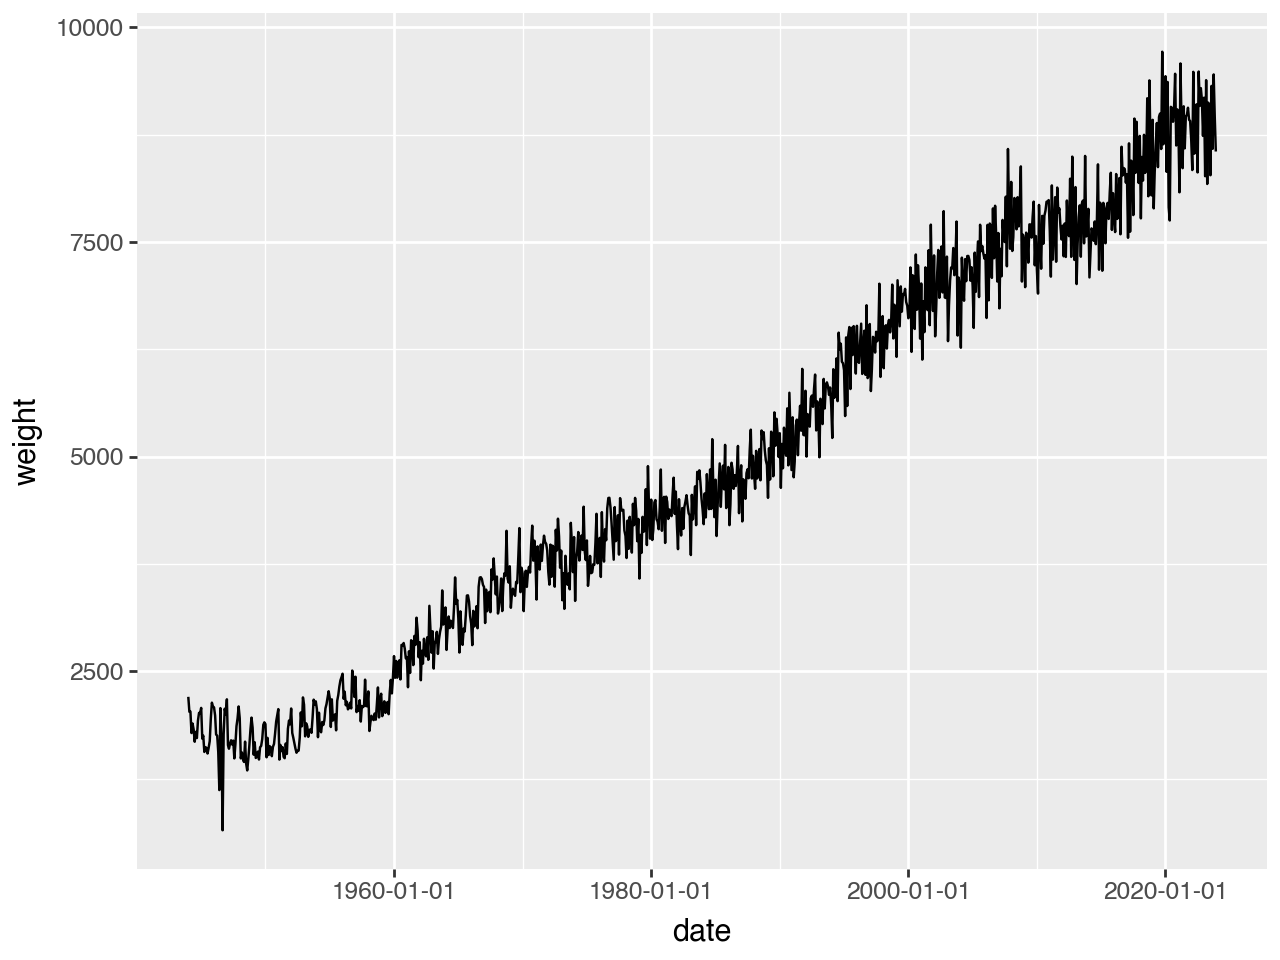

In [63]:
m_start_t =  pd.to_datetime('1950-10-18 13:00:00', utc=False)
m_stop_t = pd.to_datetime('1960-10-20 13:00:00', utc=False)

plot_df = (
    meat_long_monthly_agg
    .query("(date >= @m_start_t) & (date <= @m_stop_t)")
)

(
    gg.ggplot(meat_long_monthly_agg, gg.aes(x="date", y="weight"))
    + gg.geom_line()
)

In [62]:
#pandas to manipulate data

def test_plot(in_df):
    try: 
        plot_df = (
            in_df
            .sort_values("Registration_Time")
        )
        
        # plotnine to plot (using grammar of graphics like ggplot2)
        plot = (
            gg.ggplot(plot_df, gg.aes(x='Registration_Time', fill='org'))
            + gg.geom_histogram(binwidth=4/24, position='stack', color='black', show_legend=False)
            + gg.facet_wrap('org')
            + gg.theme_bw()
            + gg.theme(figure_size=(9,6))
            + gg.theme(axis_text_x=gg.element_text(angle=30, hjust=1))
            + gg.xlab("Time")
            + gg.ylab("Registrations") 
            + gg.ggtitle("Registrations for R workshop in first 48 hours")
        )
        _ = plot.show()
        return 1
    except TypeError:
        return 0

held: [126, 202], remaining: [144, 63, 130, 193, 22]


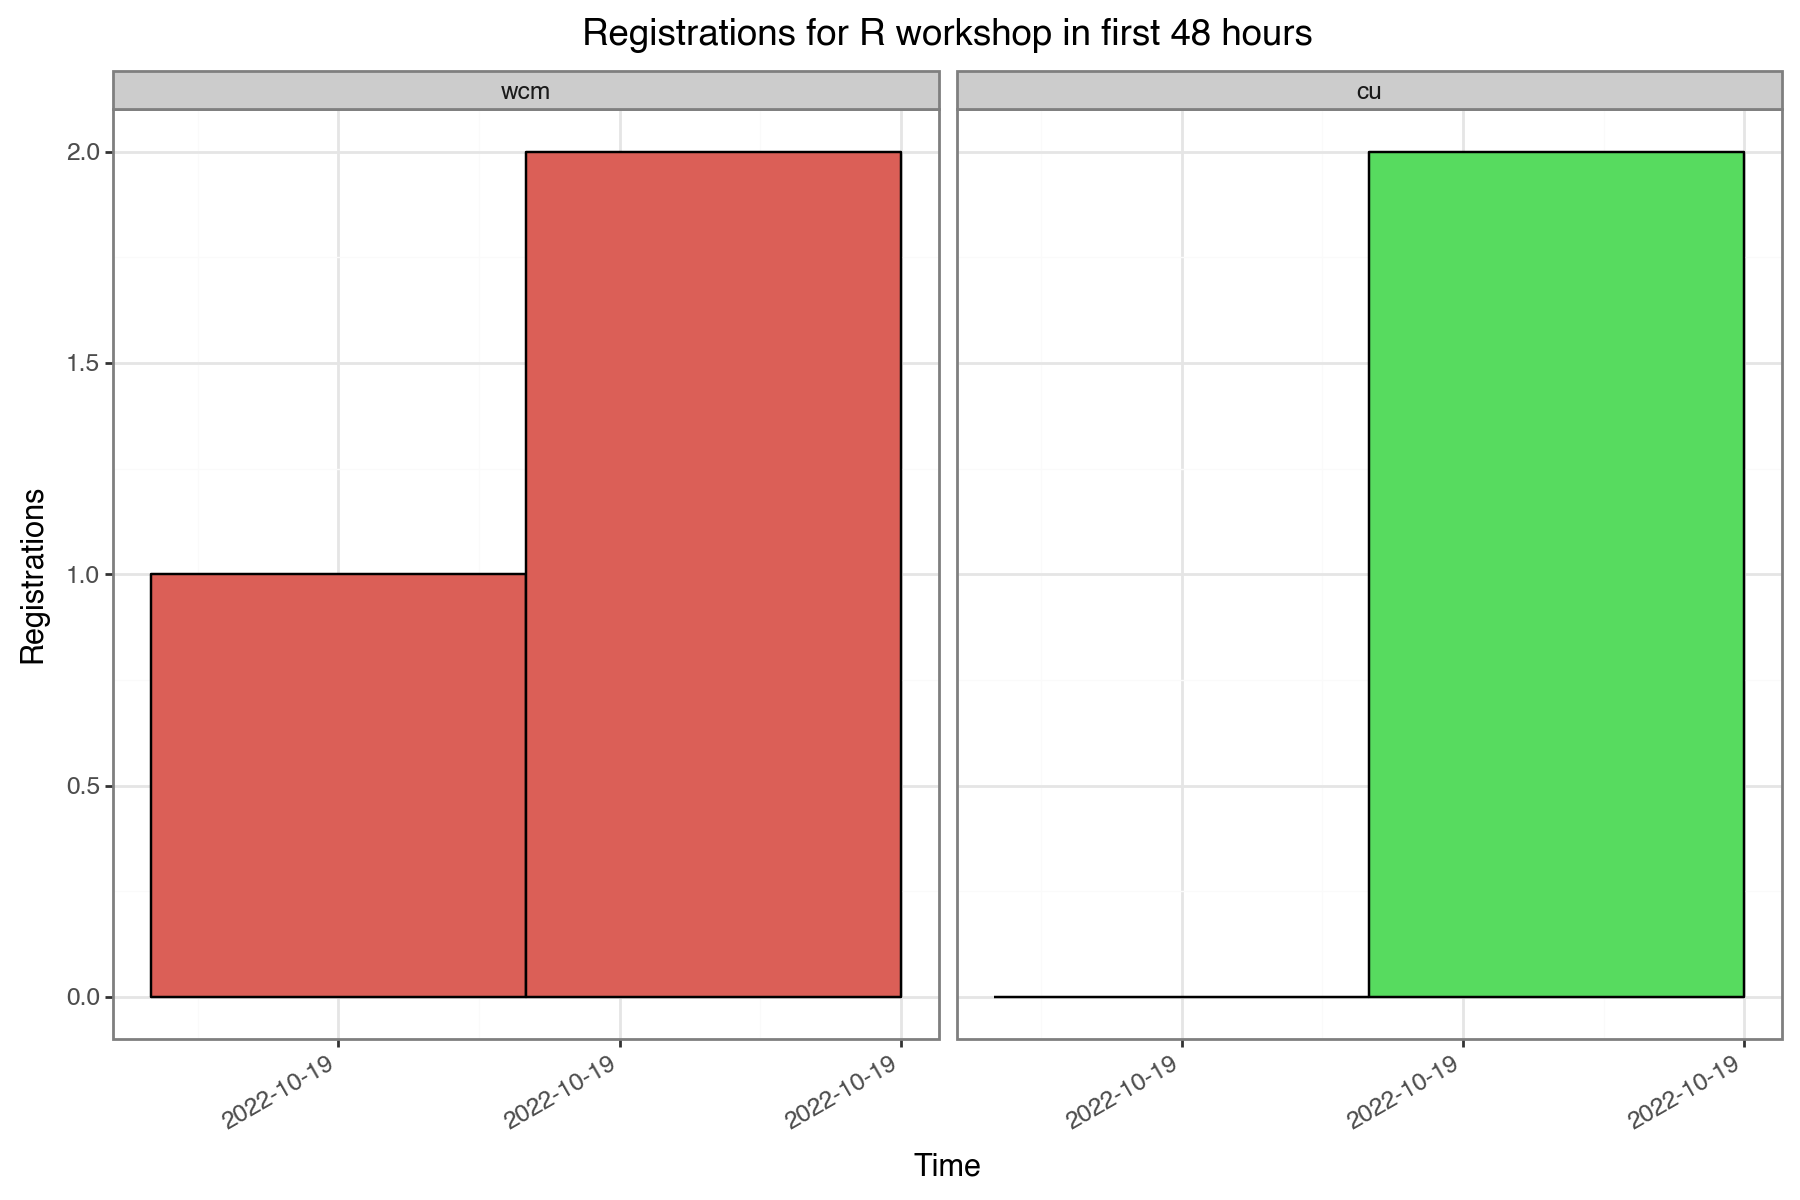

held: [144, 63], remaining: [130, 193, 22, 126, 202]


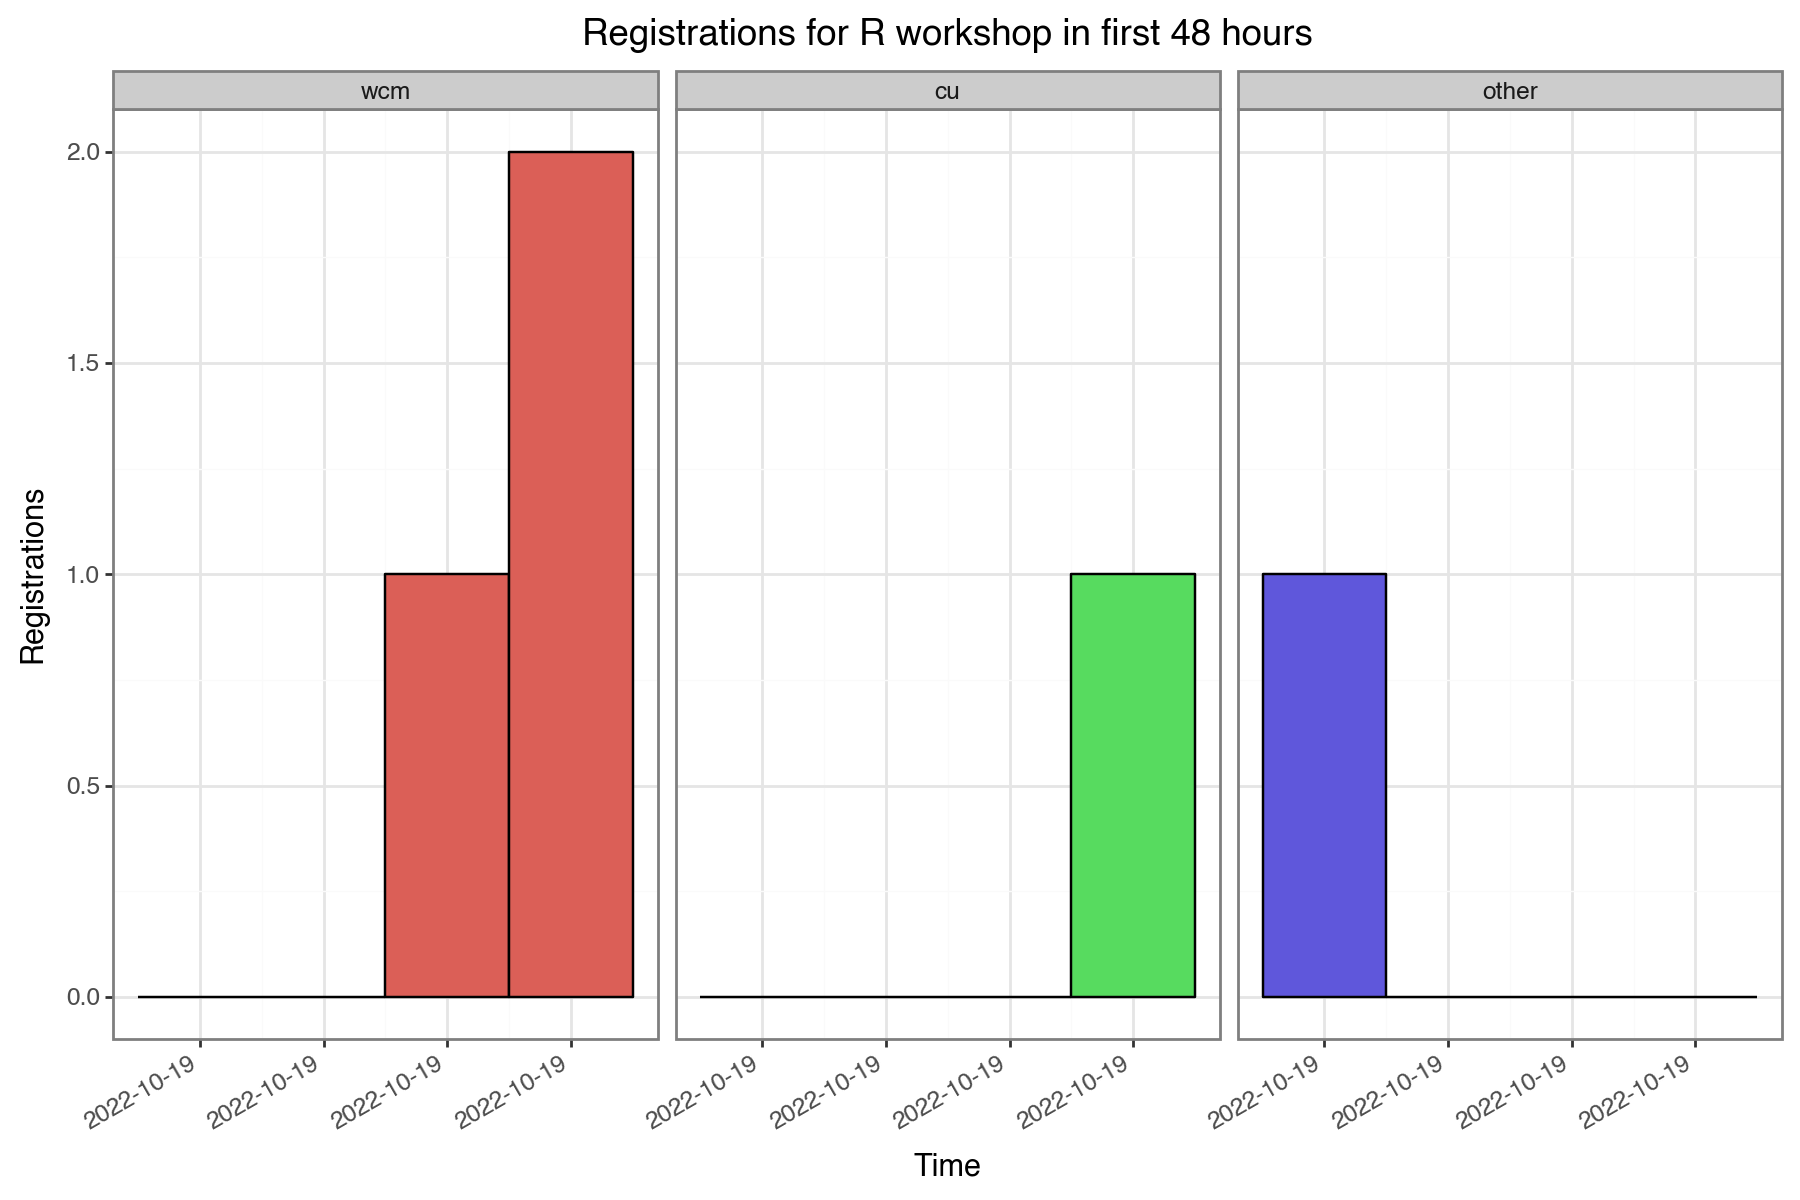

held: [130, 193], remaining: [22, 126, 202, 144, 63]


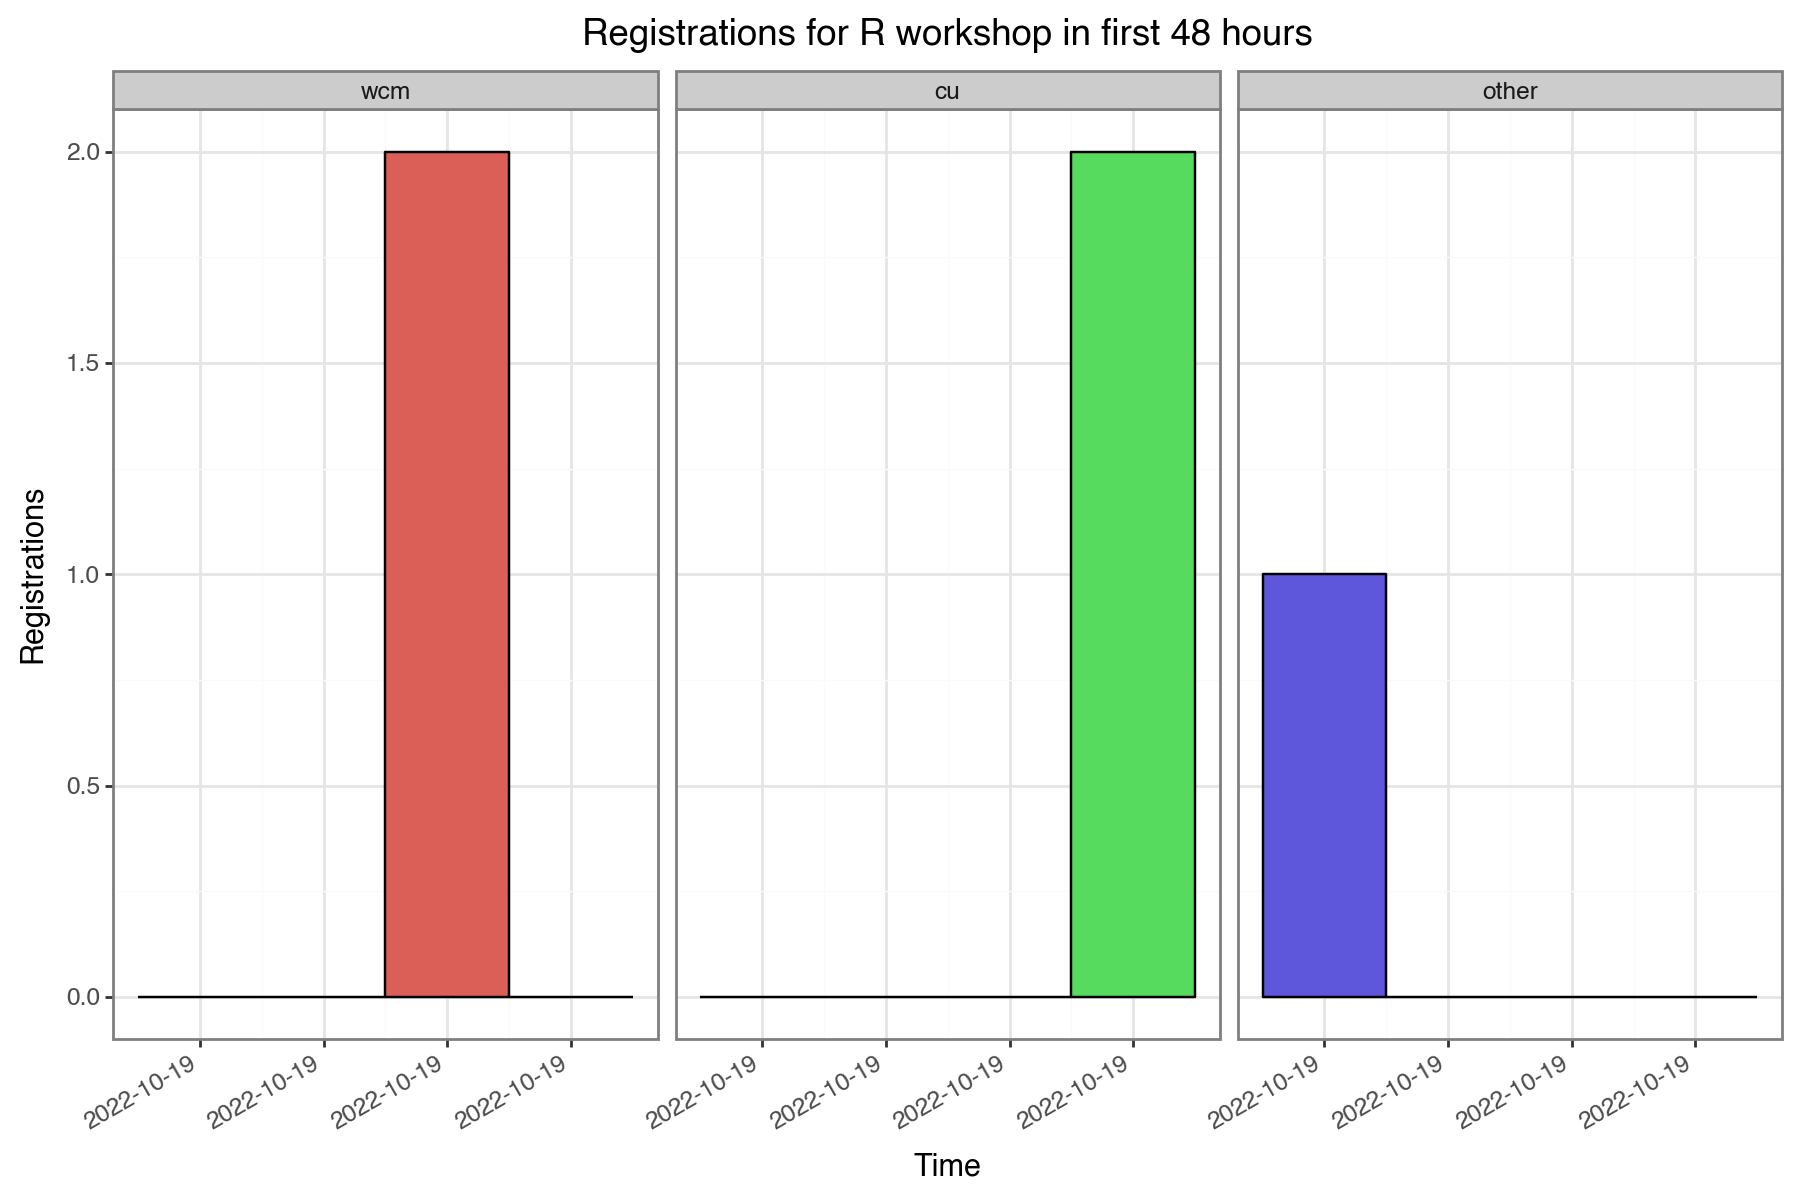

held: [22, 126], remaining: [202, 144, 63, 130, 193]


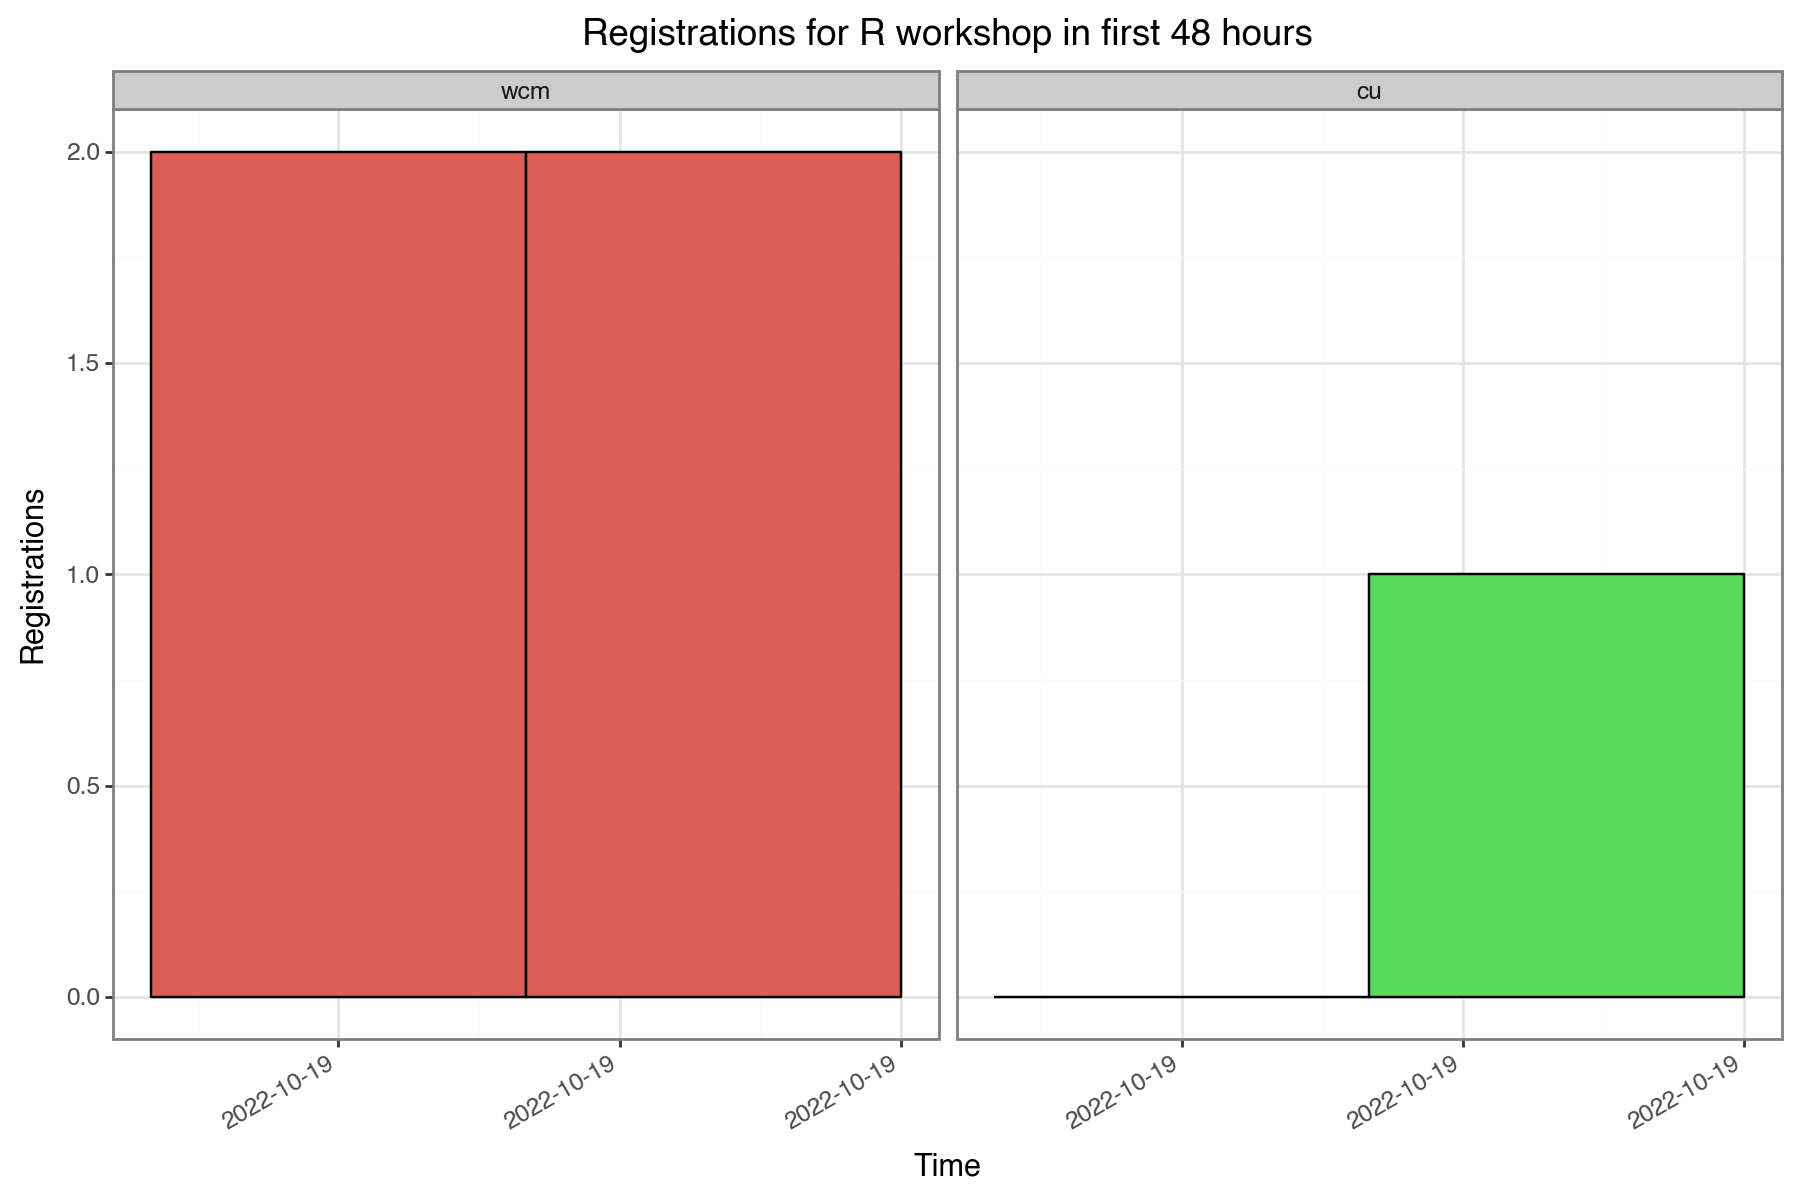

held: [202, 144], remaining: [63, 130, 193, 22, 126]


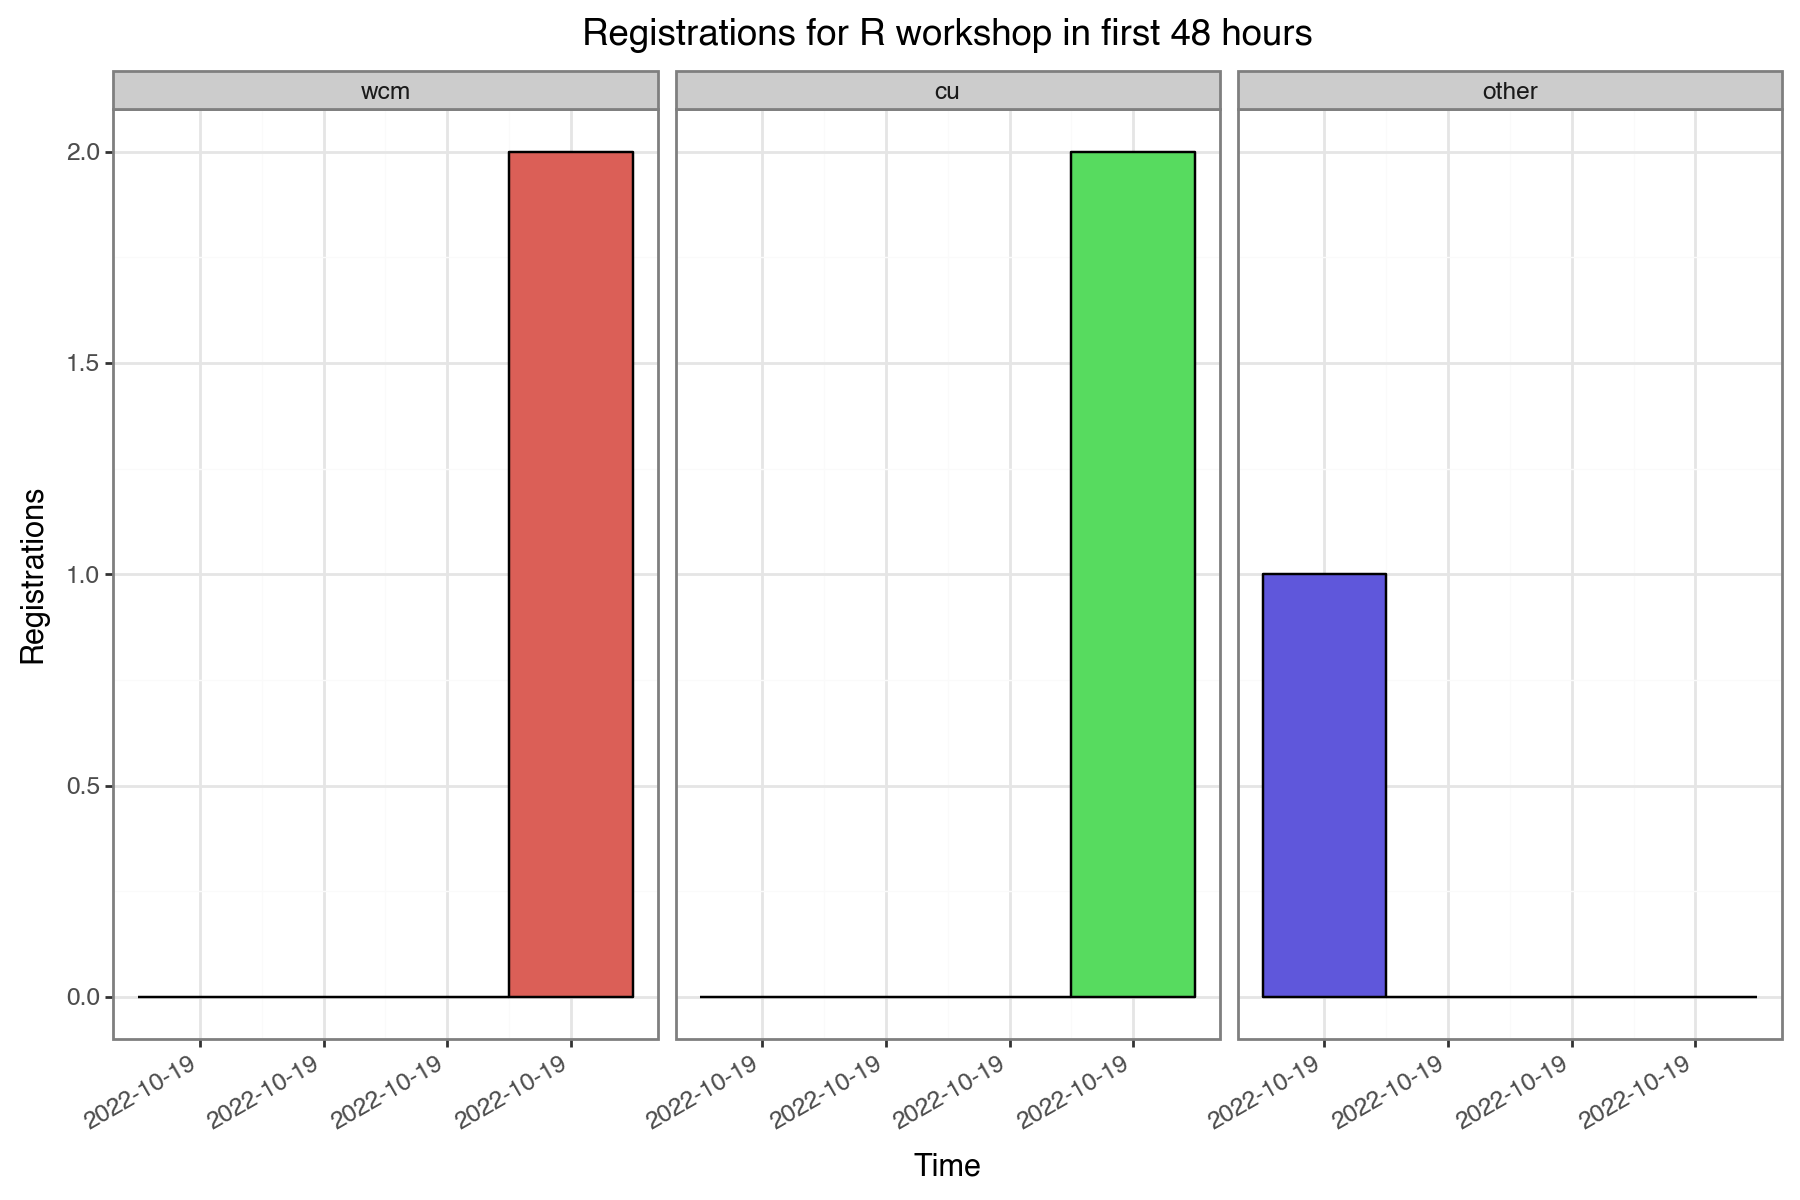

held: [63, 130], remaining: [193, 22, 126, 202, 144]


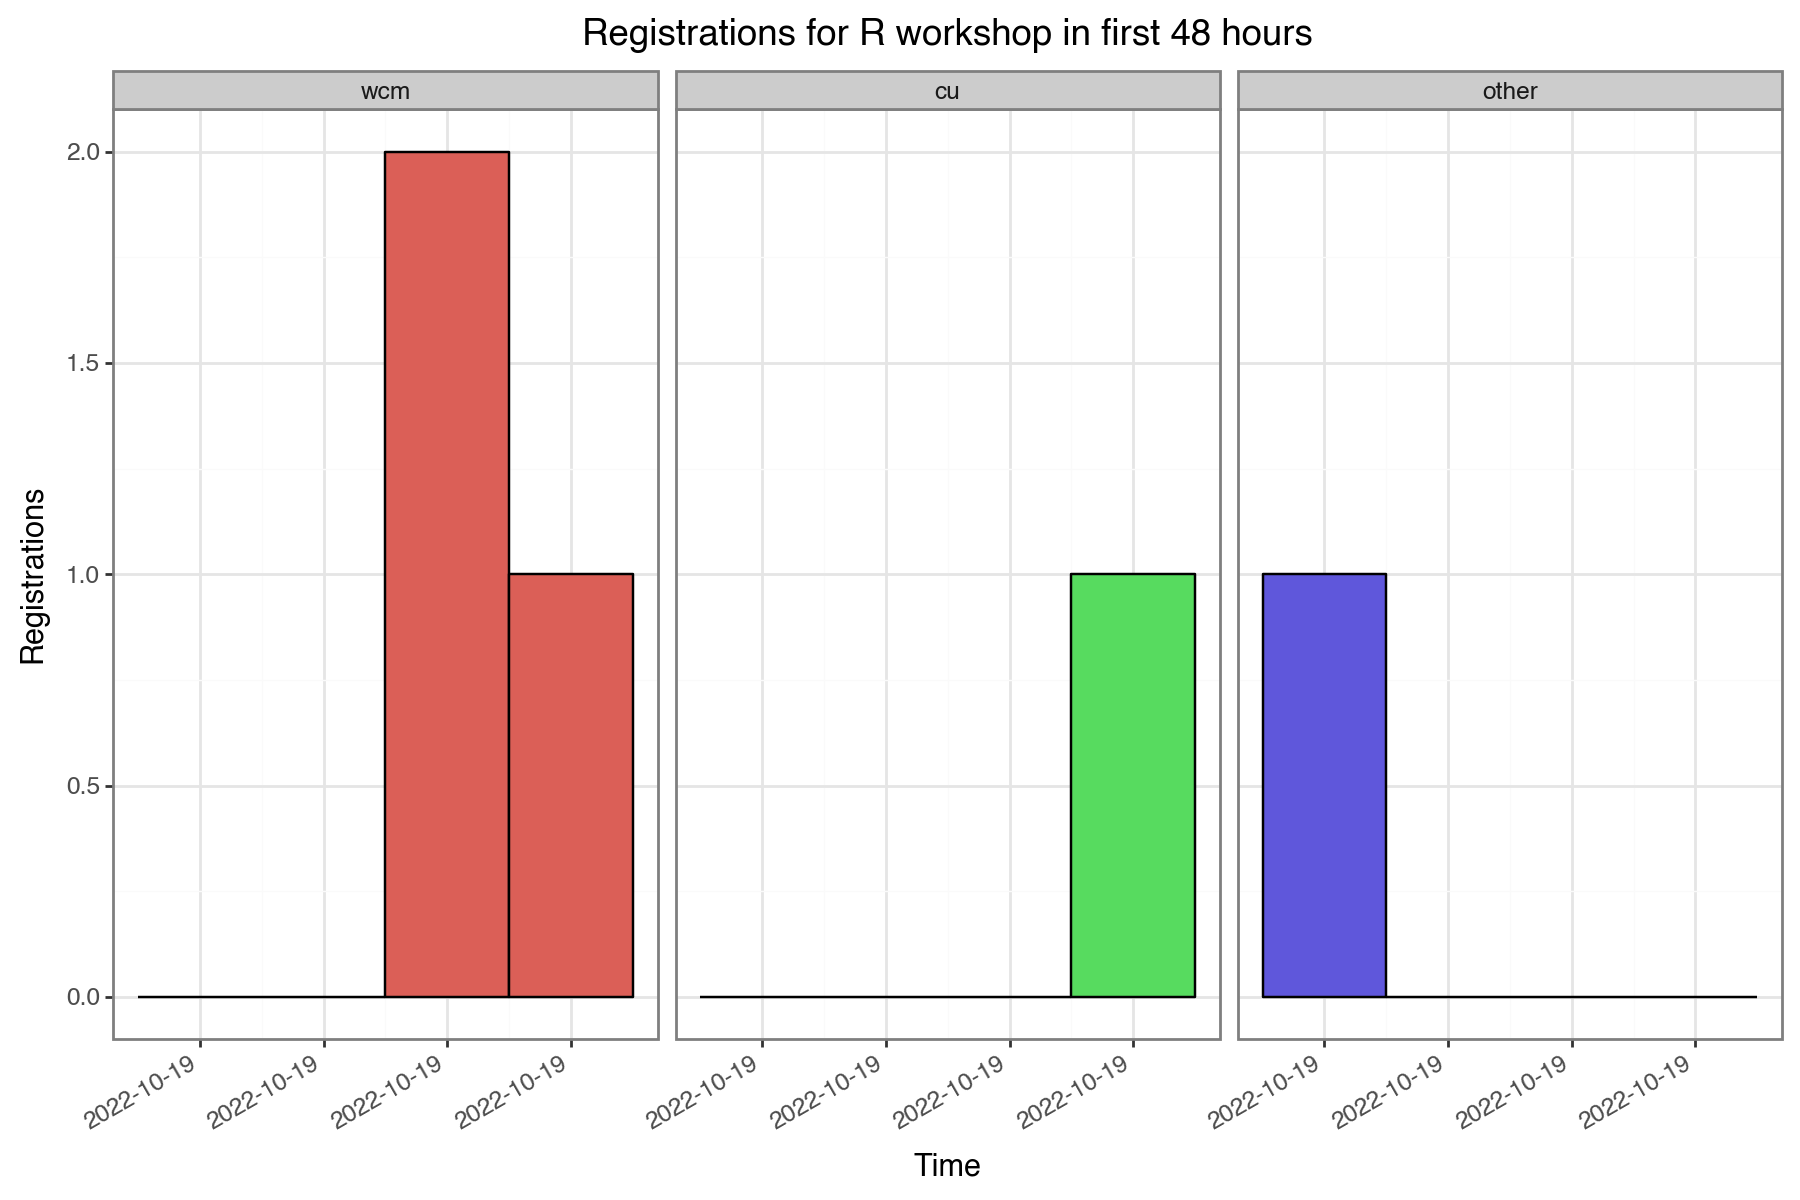

held: [193, 22], remaining: [126, 202, 144, 63, 130]


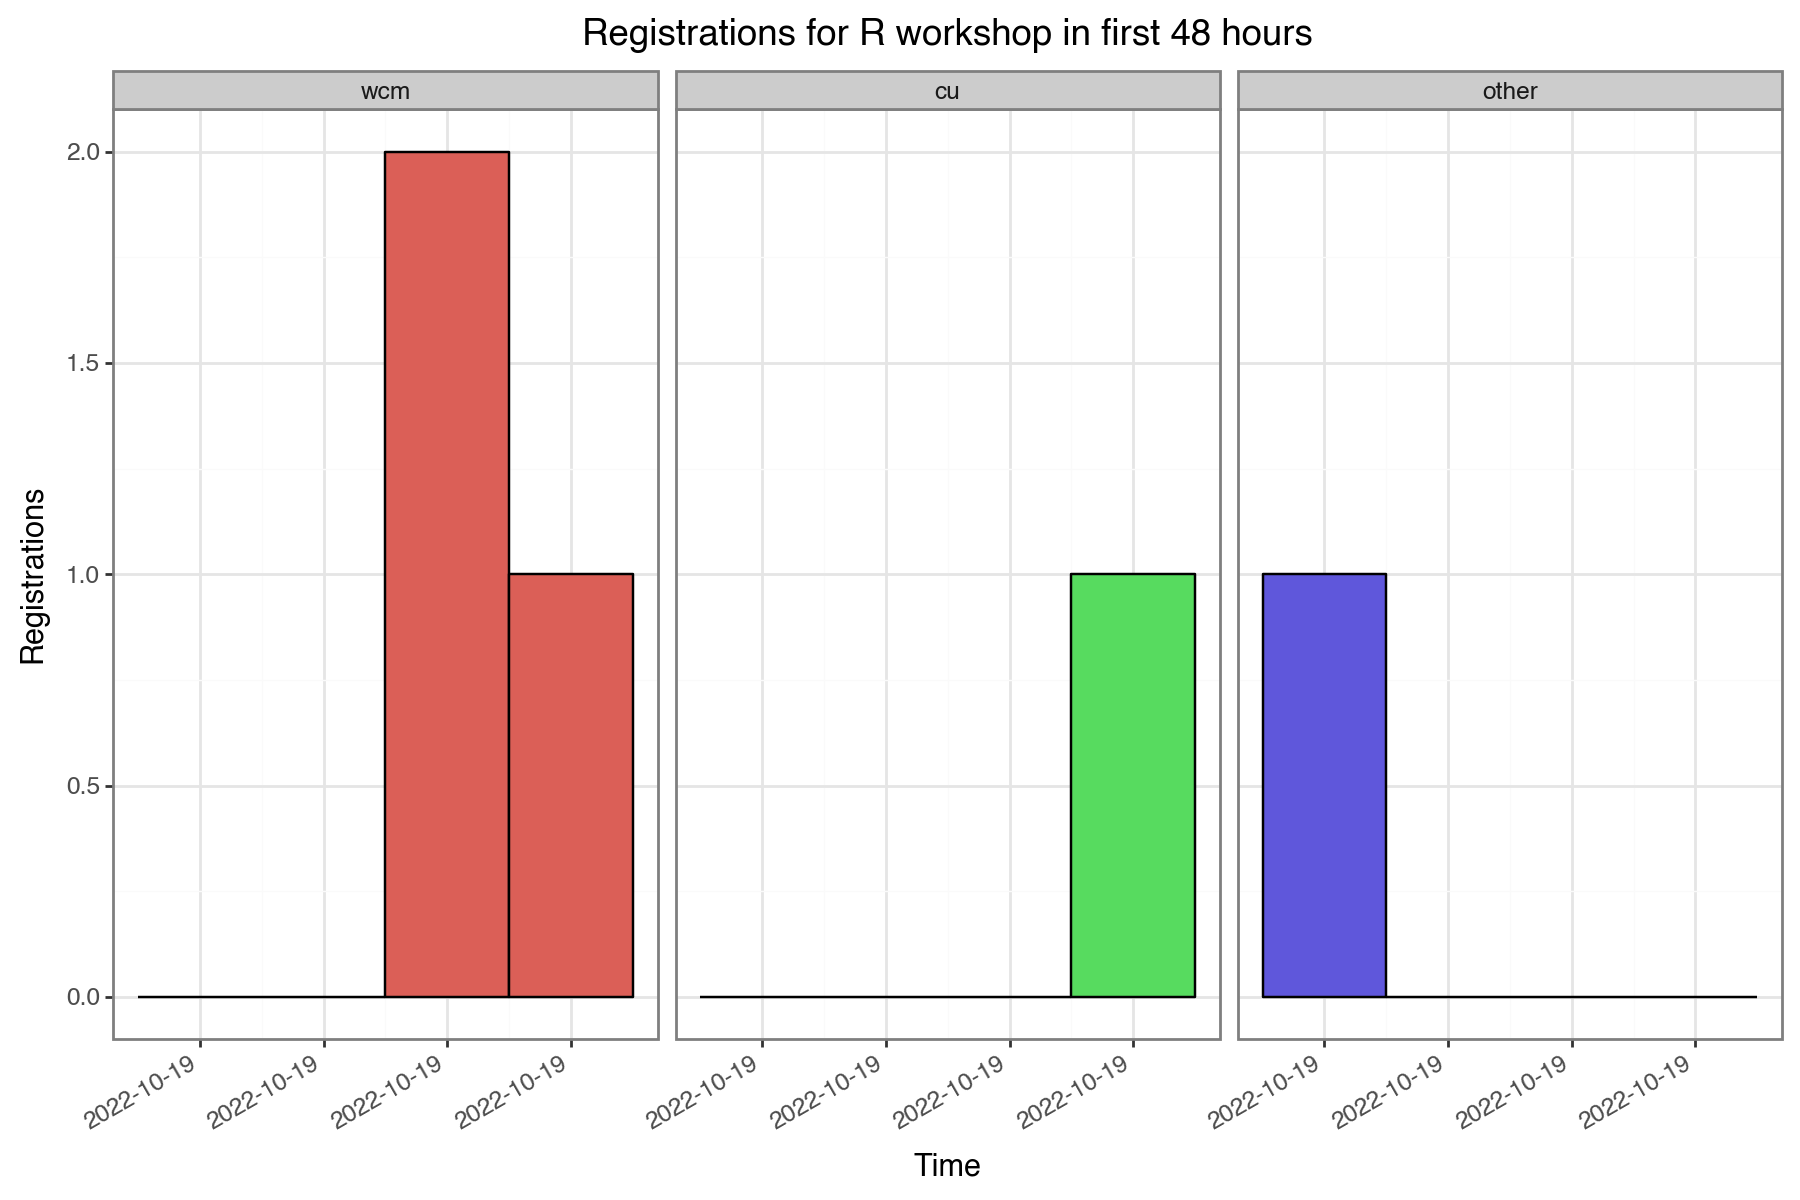

In [69]:
sus_indices = [
    126,   6, 136, 174, 185, 149, 133, 221, 260, 131, 202, 158,  90, 113,
       231, 240, 197, 218,  92, 229, 144, 159, 107, 262,   0,  20,  53,  54,
        45,  27,  63, 183,  14,  19,  89,  70,  59, 220,  98,   7, 130, 102,
        15,  13,  31,  96, 264, 187,  24,  67, 193, 124,  68,  40,  91,  44,
        57,  79,  82, 227,  22, 109, 125,  11,  49,  21, 108,   1,  80, 147,
        52
]
sus_indices = [126, 202, 144, 63, 130, 193, 22, 52]
sus_indices = sus_indices[:-1]

for i in range(len(sus_indices)):
    hold_outs = sus_indices[:2]
    sus_indices = sus_indices[2:]
    print(f"held: {hold_outs}, remaining: {sus_indices}")
    if test_plot(df.iloc[sus_indices]) == 0:
        print(failed)
    sus_indices.extend(hold_outs)
    

In [67]:
df.iloc[[126, 202, 144, 63, 130, 193, 22, 52]][["Registration_Time", "org"]].to_csv("fail_case.csv")

In [71]:
plot_df = (
    df.iloc[[126, 202, 144, 63, 130, 193, 22, 52]]
    .sort_values("Registration_Time")
)

# plotnine to plot (using grammar of graphics like ggplot2)
plot = (
    gg.ggplot(plot_df, gg.aes(x='Registration_Time', fill='org'))
    + gg.geom_histogram(binwidth=4/24, position='stack', color='black', show_legend=False)
    + gg.facet_wrap('org')
    + gg.theme_bw()
    + gg.theme(figure_size=(4,3))
    + gg.theme(axis_text_x=gg.element_text(angle=30, hjust=1))
    + gg.xlab("Time")
    + gg.ylab("Registrations") 
    + gg.ggtitle("Registrations for R workshop in first 48 hours")
)
plot.show()

TypeError: can't compare offset-naive and offset-aware datetimes